In [1]:
import json

import matplotlib.pyplot as plt
from MembraneAnalysisToolbox.DiffusionAnalysis import DiffusionAnalysis
from MembraneAnalysisToolbox.MembraneStructures import CubicMembrane, HexagonalMembrane

path = "/bigpool/users/ac130484/project/cubic_box_hex_dod/18_2_3_n/sim_1/"
# path = "/bigpool/users/ac130484/project/finished_sim/hex/poresize/2nm_NVT/simulation_1/"
print("Path: " + path + "\n")


hexagonal_structure = HexagonalMembrane(
    selector="resname C",
    L=180,
)

cubic_structure = CubicMembrane(
    selector="resname C",
    cube_arrangement=(2, 2, 2),
    cube_size=90,
    pore_radius=15,
)


# STEP 1: initialise the Data into the class
DA = DiffusionAnalysis(
    topology_file=path + "topol.tpr",
    trajectory_file=path + "traj.xtc",
    results_dir=path + "analysis/",
    analysis_max_step_size_ps=200,
    verbose=True,
    membrane=cubic_structure,
)

print(DA)

/bigpool/users/st166545/TransitionAnalysisProject/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path: /bigpool/users/ac130484/project/cubic_box_hex_dod/18_2_3_n/sim_1/

Results will be saved in: /bigpool/users/ac130484/project/cubic_box_hex_dod/18_2_3_n/sim_1/analysis/.
DiffusionAnalysis object:
  topology_file: /bigpool/users/ac130484/project/cubic_box_hex_dod/18_2_3_n/sim_1/topol.tpr
  trajectory_file: /bigpool/users/ac130484/project/cubic_box_hex_dod/18_2_3_n/sim_1/traj.xtc
  results_dir: /bigpool/users/ac130484/project/cubic_box_hex_dod/18_2_3_n/sim_1/analysis/
  Membrane: HexagonalMembrane: L=180; selector=resname C; lowerZ=None, cube_arrangement=(2, 2, 2), cube_size=90
  verbose: True
  trajectories: dict_keys([])
  results: 
      D: {}
      passageTimes: {}
      passageStarts: {}
      passageIndices: {}
      n_passages: {}
  Simulation footprints: 
      u_trajectory_dt (ps): 500.0
      u_sim_time (ps): 5000000.0
      analysis_max_step_size_ps (ps): 200
      actual analysed step_size (ps): 500.0
      nth_frame: 1
      n_frames analysed: 10001
      ana_sim_time (

In [2]:
DA._allocateTrajectories("resname C")

Allocating trajectories for selectors: "resname C".
	Progress: 100%
Trajectories allocated.


In [3]:
DA.find_membrane_location()

In [4]:
DA.print_membrane_location()

Lower boundary of the hexagonal structure: 204.6300048828125


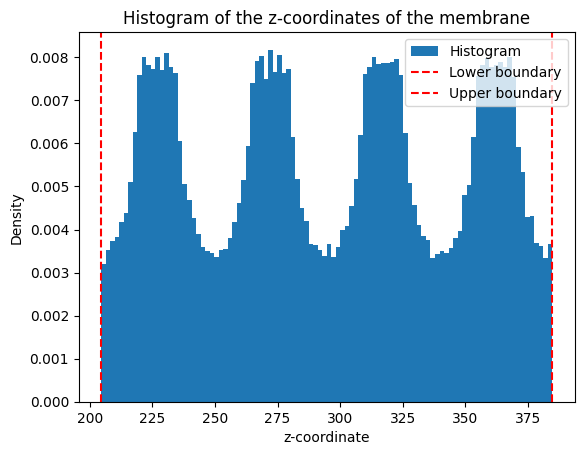

In [5]:
DA.verify_membrane_location()

In [6]:
selector = "resname HEX and name C1"
short = "hex"
DA._allocateTrajectories(selector)

Allocating trajectories for selectors: "resname HEX and name C1".
	Progress: 100%
Trajectories allocated.


In [7]:
DA.calc_passagetimes(selector)
print(f"\t{short}-passages: " + str(len(DA.passageTimes[selector])))

	hex-passages: 63133


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Durchgangszeiten in ns', ylabel='relative Häufigkeit'>)

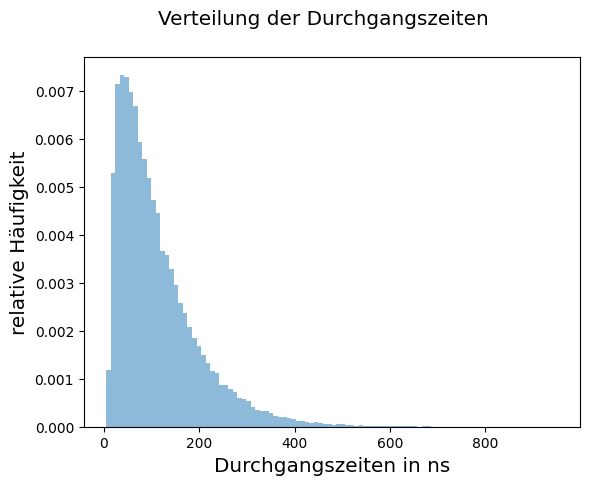

In [8]:
DA.plot_passagetimedist(selector)

In [9]:
DA.calc_diffusion(selector)
print(f"\t{short}-Diffusioncoefficient: " + str(DA.D[selector]).replace(".", ","))

	hex-Diffusioncoefficient: 51,30923029930483


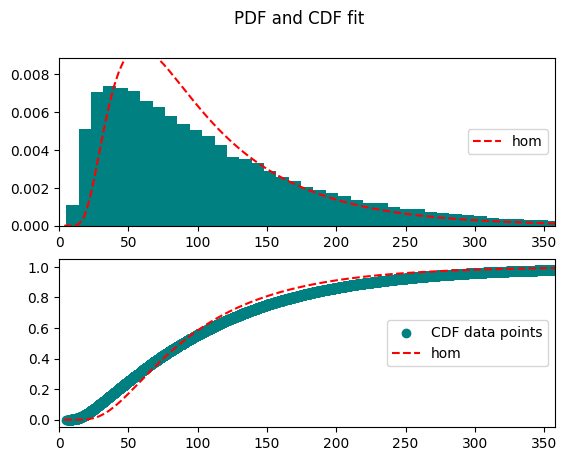

In [10]:
fig_diff = DA.plot_diffusion(selector)

63133
[42000]
[6531.]
[6531]
[6710.]
[6710]
[22891]


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

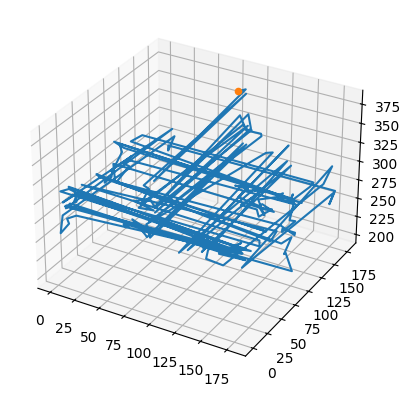

In [11]:
DA.create_rand_passages_plot("resname HEX and name C1", 1)

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: title={'center': 'Membrane-entry points of the passage-trajectories (HEX)'}, xlabel='x in nm', ylabel='y in nm', zlabel='z in nm'>)

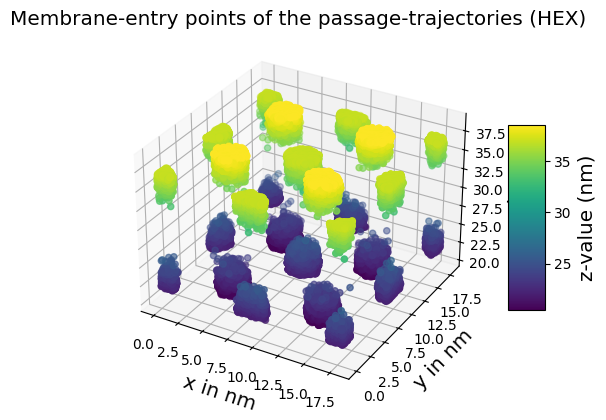

In [12]:
DA.plot_starting_points("resname HEX and name C1")